# Decision Tree - Visit Data
The Goal:

In [2]:
'''Imported Packages'''
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## Data Description

### Variable Descriptions:
* 
* 
### Special Notes:
* 

## Data Preparation 

In [3]:
'''Load the Data'''

# path to the data files
DATASET_DIR = "" # leave blank for same directory
FILE_NAME = "visit_data.csv"

# load titanic dataset
visit_data_df = pd.read_csv(DATASET_DIR + FILE_NAME, delimiter = ",")

# randomize the dataset
'''
If you split the data then the resulting sets won't represent the true distribution of the dataset. 
Therefore, we have to shuffle the original dataset in order to minimise variance and ensure that the model will generalize well to new, unseen data points.
'''
np.random.seed(42)
visit_data_df = shuffle(visit_data_df)

# Display the first 5 rows of our data
visit_data_df.head()

,ID_NUMBER,TARGET,FIRST_VISIT_DATEKEY,AL,AN,AT,CA,CT,FR,FS,...,DONOR_STATUS,CURRENT_SOLICIT_SEGMENT,SIMPLE_RATING,CONSECUTIVE_YRS_OF_GIVING_BIN,FIS_YEARS_OF_GIVING,FYOG_COUNT_BINNED,CHALLENGE_REGION,YEARS_SINCE_UD_CONNECTION,YEARS_GAVE_SINCE_UD_CONNECTION,GIVING_YEARS_SATURATION
298,1818,0,99999999,1,0,0,0,0,0,0,...,Ever Donor,AL Only - Lapsed 11+ Years,<$50K,3-5,9,6-9,New York City,40,9,0.23
1809,310977,1,20210721,1,0,0,0,0,0,0,...,Lapsed 1 yr,GOLD Lapsed 1 Year,No Rating,1,3,3-5,New Castle County DE,8,3,0.38
1575,17888,0,99999999,1,0,0,0,0,0,0,...,Future Donor,AL Only - Future Donor,$250K - $1MM,0,0,0,Philadelphia,36,0,0.00
2447,477682,0,99999999,0,0,0,0,0,0,0,...,Future Donor,Current Parent Sophomore FUTURE,$250K - $1MM,0,0,0,None,0,0,0.00
929,12942,0,99999999,1,0,0,0,0,0,0,...,Ever Donor,Current Parent Senior LAPSED,$50K - $250K,1,2,2,Northern NJ,35,2,0.06


### Exploratory Data Analysis (EDA)

In [5]:
# what does the structure of the data look like?
visit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 298 to 860
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_NUMBER                       2667 non-null   int64  
 1   TARGET                          2667 non-null   int64  
 2   FIRST_VISIT_DATEKEY             2667 non-null   int64  
 3   AL                              2667 non-null   int64  
 4   AN                              2667 non-null   int64  
 5   AT                              2667 non-null   int64  
 6   CA                              2667 non-null   int64  
 7   CT                              2667 non-null   int64  
 8   FR                              2667 non-null   int64  
 9   FS                              2667 non-null   int64  
 10  GA                              2667 non-null   int64  
 11  GS                              2667 non-null   int64  
 12  HD                              2

In [6]:


'''Prepare the data'''
# Remove some fields
# ID Number is an auto assigned number at time of entry into Development and Alumni Relations system
visit_data_df = visit_data_df.drop("ID_NUMBER", axis =1)

# Incomplete data that reduces the set too much
visit_data_df = visit_data_df.drop("FIRST_VISIT_DATEKEY", axis =1)
visit_data_df = visit_data_df.drop("FIRST_ATTENDED_EVENT_DATEKEY", axis =1)
visit_data_df = visit_data_df.drop("LAST_ATTENDED_EVENT_DATEKEY", axis =1)

# Fields I haven't dealt with yet
visit_data_df = visit_data_df.drop("CLASS_YEAR", axis =1)
visit_data_df = visit_data_df.drop("CLASS_YEAR_DECADE", axis =1)
visit_data_df = visit_data_df.drop("YOUNG_ALUMNI_IND", axis =1)
visit_data_df = visit_data_df.drop("BINNED_AGE", axis =1)
visit_data_df = visit_data_df.drop("SIMPLE_RATING", axis =1)
visit_data_df = visit_data_df.drop("CONSECUTIVE_YRS_OF_GIVING_BIN", axis =1)
visit_data_df = visit_data_df.drop("FYOG_COUNT_BINNED", axis =1)

# Drop NaN columns  
visit_data_df = visit_data_df.dropna()


# categorical variables need to be altered to 
cat_cols = ['DONOR_CATEGORY','FLD_OF_WORK_CODE','DONOR_STATUS', 'CURRENT_SOLICIT_SEGMENT','POSITION_LEVEL_CODE','CHALLENGE_REGION']
for col in cat_cols:
    visit_data_df[col] = visit_data_df[col].astype('category').cat.codes

continuous_cols = ['DONOR_RANK', 'M_RANK', 'R_RANK','F_RANK','AGE', 'POSITION_LEVEL_CODE', 'NUM_EVENTS_REGISTERED','NUM_EVENTS_REGISTERED_LAST_5FY','NUM_EVTS_CONFIRMED_ATTEND','NUM_EVT_CONFIRM_ATTEND_LST_5FY']
for col in continuous_cols:
    visit_data_df[col] = pd.to_numeric(visit_data_df[col], errors='coerce')

visit_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 298 to 860
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TARGET                          1622 non-null   int64  
 1   AL                              1622 non-null   int64  
 2   AN                              1622 non-null   int64  
 3   AT                              1622 non-null   int64  
 4   CA                              1622 non-null   int64  
 5   CT                              1622 non-null   int64  
 6   FR                              1622 non-null   int64  
 7   FS                              1622 non-null   int64  
 8   GA                              1622 non-null   int64  
 9   GS                              1622 non-null   int64  
 10  HD                              1622 non-null   int64  
 11  HR                              1622 non-null   int64  
 12  MD                              1

## Train/Test Split

In [7]:
#visit_data_df = visit_data_df.dropna()

x = visit_data_df.drop(['TARGET'], axis=1)
y = visit_data_df['TARGET']

# split train/test
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.30)

In [8]:
x_train_data.shape

(1135, 75)

In [9]:
x_train_data.shape

(1135, 75)

In [10]:
decision_tree = DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train_data, y_train_data)

DecisionTreeClassifier(max_depth=4)

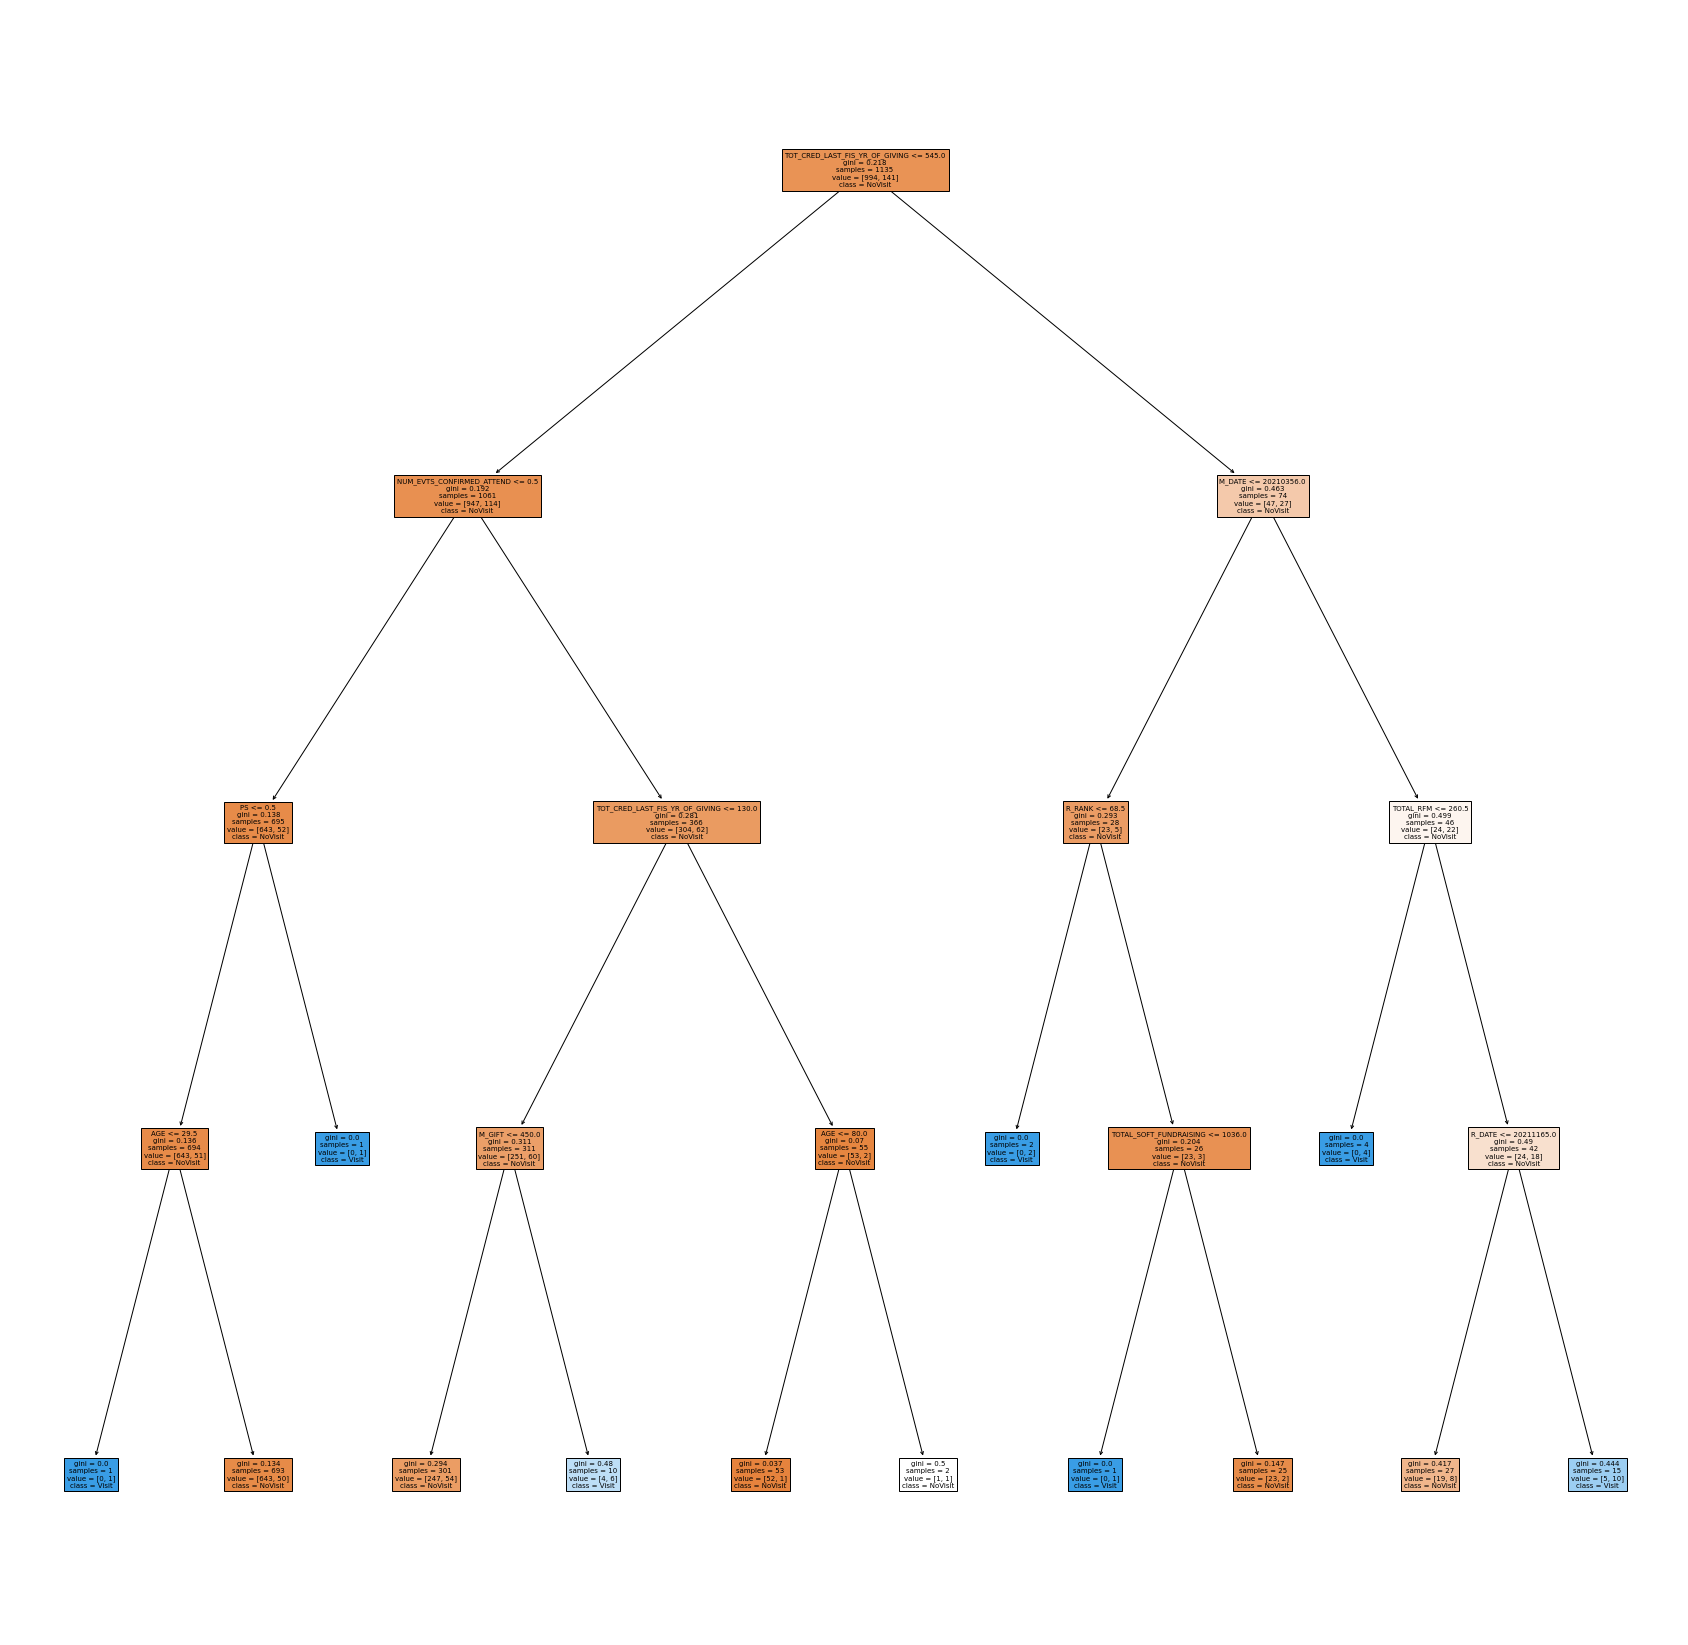

In [11]:
plt.figure(figsize=(30,30))
plot_tree(decision_tree, feature_names = x_train_data.columns, class_names = ['NoVisit','Visit'], filled=True)
plt.show()

In [13]:
'''
Used the dtreeviz package to pretty up the Decision Tree. Installation notes for this package can be found here: https://github.com/parrt/dtreeviz
'''
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

viz = dtreeviz(decision_tree,             
               x_data=x_train_data,
               y_data=y_train_data,
               target_name='class',
               feature_names=x_train_data.columns, 
               class_names=list(['NoVisit','Visit']), 
               title="Decision Tree - Visit data set") 
viz
viz.view()

* At each node, we can see a stacked histogram of the feature that is used for splitting the observations, colored by class. This way, we can see how the classes are segregated by each split. The small triangle with the value at the x-axis is the splitting point. 
* The right branches of the tree indicate selecting the values larger or equal to the splitting value, while the left one lesser than the splitting value. The leaf nodes are represented as pie charts, which show what fraction of the observations within the leaf belongs to which class. This way, we easily see which class is the majority one, so also the model’s prediction.
* One thing we do not see at this plot is the value of the Gini coefficient at each node. In my opinion, the histogram provides more intuition about the split and the value of the coefficient might not be that relevant in case of a presentation for the stakeholders either way.